### 1. Model Default

Bentuk data latih setelah SMOTE: (7776, 16)
Distribusi kelas target setelah SMOTE:
 stroke
0    3888
1    3888
Name: count, dtype: int64

===== Hasil Evaluasi Model Regresi Logistik =====

Confusion Matrix:
[[718 254]
 [ 10  40]]

Confusion Matrix:


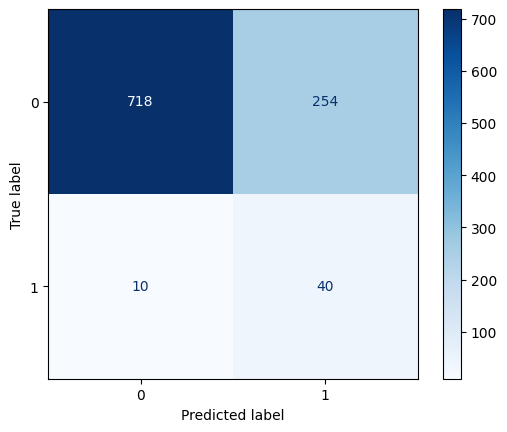


Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.99      0.74      0.84       972
           1       0.14      0.80      0.23        50

    accuracy                           0.74      1022
   macro avg       0.56      0.77      0.54      1022
weighted avg       0.94      0.74      0.81      1022


Skor AUC-ROC: 0.8394


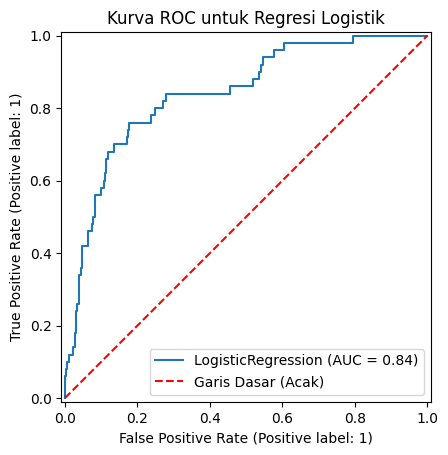

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

# Muat dataset yang sudah di-encode
df = pd.read_csv('data/healthcare-dataset-stroke-data-encoded.csv')

# Pisahkan fitur (X) dan target (y)
X = df.drop('stroke', axis=1)
y = df['stroke']

# Bagi data menjadi set pelatihan dan pengujian (80% latih, 20% uji)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Penskalaan Fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Penanganan Kelas Tidak Seimbang (SMOTE) pada data latih
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

print("Bentuk data latih setelah SMOTE:", X_train_resampled.shape)
print("Distribusi kelas target setelah SMOTE:\n", pd.Series(y_train_resampled).value_counts())

# Latih Model Regresi Logistik
model = LogisticRegression()
model.fit(X_train_resampled, y_train_resampled)

# Buat prediksi pada data uji
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

# Tampilkan hasil evaluasi
print("\n===== Hasil Evaluasi Model Regresi Logistik =====")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred))
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"\nSkor AUC-ROC: {auc_score:.4f}")

# Visualisasi Kurva ROC
RocCurveDisplay.from_estimator(model, X_test_scaled, y_test)
plt.title('Kurva ROC untuk Regresi Logistik')
plt.plot([0, 1], [0, 1], 'r--', label='Garis Dasar (Acak)')
plt.legend()
plt.show()

### 2. HyperParameter Tuning

Bentuk data latih setelah SMOTE: (7776, 16)
Distribusi kelas target setelah SMOTE:
 stroke
0    3888
1    3888
Name: count, dtype: int64

===== Hasil Evaluasi Model Regresi Logistik =====

Confusion Matrix:
[[691 281]
 [  8  42]]

Confusion Matrix:


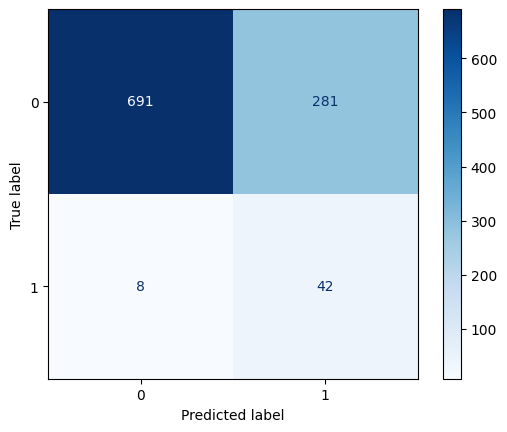


Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.99      0.71      0.83       972
           1       0.13      0.84      0.23        50

    accuracy                           0.72      1022
   macro avg       0.56      0.78      0.53      1022
weighted avg       0.95      0.72      0.80      1022


Skor AUC-ROC: 0.8390


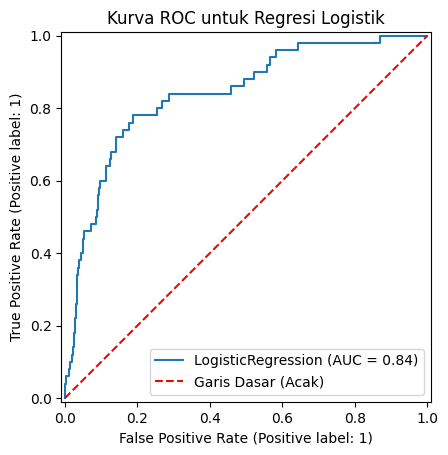

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

# Muat dataset yang sudah di-encode
df = pd.read_csv('data/healthcare-dataset-stroke-data-encoded.csv')

# Pisahkan fitur (X) dan target (y)
X = df.drop('stroke', axis=1)
y = df['stroke']

# Bagi data menjadi set pelatihan dan pengujian (80% latih, 20% uji)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Penskalaan Fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Penanganan Kelas Tidak Seimbang (SMOTE) pada data latih
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

print("Bentuk data latih setelah SMOTE:", X_train_resampled.shape)
print("Distribusi kelas target setelah SMOTE:\n", pd.Series(y_train_resampled).value_counts())

# Latih Model Regresi Logistik
model = LogisticRegression(
    C= 0.01,
    class_weight =  'balanced',
    penalty = 'l1',
    solver =  'liblinear',
    random_state= 42,
    max_iter =  1000
)
model.fit(X_train_resampled, y_train_resampled)

# Buat prediksi pada data uji
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

# Tampilkan hasil evaluasi
print("\n===== Hasil Evaluasi Model Regresi Logistik =====")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred))
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"\nSkor AUC-ROC: {auc_score:.4f}")

# Visualisasi Kurva ROC
RocCurveDisplay.from_estimator(model, X_test_scaled, y_test)
plt.title('Kurva ROC untuk Regresi Logistik')
plt.plot([0, 1], [0, 1], 'r--', label='Garis Dasar (Acak)')
plt.legend()
plt.show()

### 3. Standarisasi vs Normalisasi

##### Normalisasi

Bentuk data latih setelah SMOTE: (7776, 16)
Distribusi kelas target setelah SMOTE:
 stroke
0    3888
1    3888
Name: count, dtype: int64

===== Hasil Evaluasi Model Regresi Logistik =====

Confusion Matrix:
[[714 258]
 [ 10  40]]

Confusion Matrix:


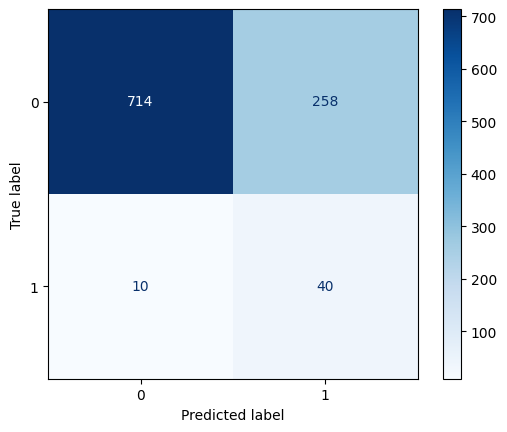


Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.99      0.73      0.84       972
           1       0.13      0.80      0.23        50

    accuracy                           0.74      1022
   macro avg       0.56      0.77      0.54      1022
weighted avg       0.94      0.74      0.81      1022


Skor AUC-ROC: 0.8371


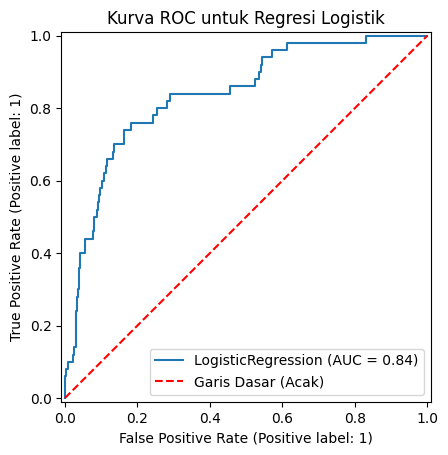

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

# Muat dataset yang sudah di-encode
df = pd.read_csv('data/healthcare-dataset-stroke-data-encoded.csv')

# Pisahkan fitur (X) dan target (y)
X = df.drop('stroke', axis=1)
y = df['stroke']

# Bagi data menjadi set pelatihan dan pengujian (80% latih, 20% uji)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Penskalaan Fitur
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Penanganan Kelas Tidak Seimbang (SMOTE) pada data latih
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

print("Bentuk data latih setelah SMOTE:", X_train_resampled.shape)
print("Distribusi kelas target setelah SMOTE:\n", pd.Series(y_train_resampled).value_counts())

# Latih Model Regresi Logistik
model = LogisticRegression()
model.fit(X_train_resampled, y_train_resampled)

# Buat prediksi pada data uji
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

# Tampilkan hasil evaluasi
print("\n===== Hasil Evaluasi Model Regresi Logistik =====")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred))
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"\nSkor AUC-ROC: {auc_score:.4f}")

# Visualisasi Kurva ROC
RocCurveDisplay.from_estimator(model, X_test_scaled, y_test)
plt.title('Kurva ROC untuk Regresi Logistik')
plt.plot([0, 1], [0, 1], 'r--', label='Garis Dasar (Acak)')
plt.legend()
plt.show()

### 4. Feature Engineering

Bentuk data latih setelah SMOTE: (7776, 25)
Distribusi kelas target setelah SMOTE:
 stroke
0    3888
1    3888
Name: count, dtype: int64

===== Hasil Evaluasi Model Regresi Logistik =====

Confusion Matrix:
[[951  21]
 [  3  47]]

Confusion Matrix:


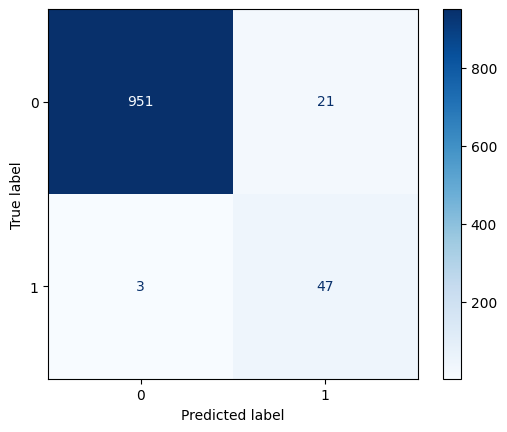


Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       972
           1       0.69      0.94      0.80        50

    accuracy                           0.98      1022
   macro avg       0.84      0.96      0.89      1022
weighted avg       0.98      0.98      0.98      1022


Skor AUC-ROC: 0.9969


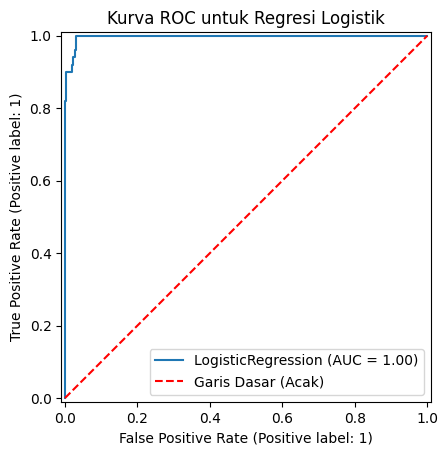

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

# Muat dataset yang sudah di-encode
df = pd.read_csv('data/stroke-data-feat-eng-one-hot.csv')

# Pisahkan fitur (X) dan target (y)
X = df.drop('stroke', axis=1)
y = df['stroke']

# Bagi data menjadi set pelatihan dan pengujian (80% latih, 20% uji)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Penskalaan Fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Penanganan Kelas Tidak Seimbang (SMOTE) pada data latih
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

print("Bentuk data latih setelah SMOTE:", X_train_resampled.shape)
print("Distribusi kelas target setelah SMOTE:\n", pd.Series(y_train_resampled).value_counts())

# Latih Model Regresi Logistik
model = LogisticRegression()
model.fit(X_train_resampled, y_train_resampled)

# Buat prediksi pada data uji
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

# Tampilkan hasil evaluasi
print("\n===== Hasil Evaluasi Model Regresi Logistik =====")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred))
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"\nSkor AUC-ROC: {auc_score:.4f}")

# Visualisasi Kurva ROC
RocCurveDisplay.from_estimator(model, X_test_scaled, y_test)
plt.title('Kurva ROC untuk Regresi Logistik')
plt.plot([0, 1], [0, 1], 'r--', label='Garis Dasar (Acak)')
plt.legend()
plt.show()

### 5. Normalisasi Vs Non-Normalisasi

Bentuk data latih setelah SMOTE: (7776, 16)
Distribusi kelas target setelah SMOTE:
 stroke
0    3888
1    3888
Name: count, dtype: int64

===== Hasil Evaluasi Model Regresi Logistik =====

Confusion Matrix:
[[802 170]
 [ 24  26]]

Confusion Matrix:


/home/martian/data-science/Data_science/env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


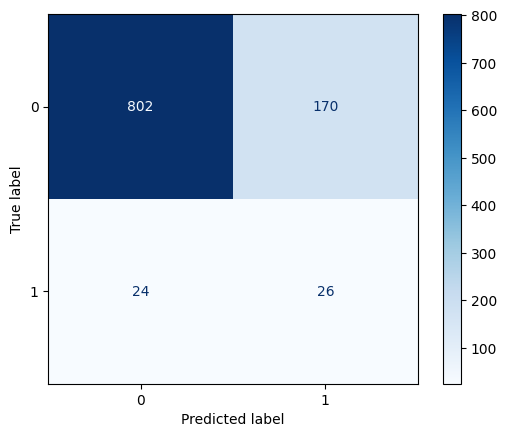


Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.97      0.83      0.89       972
           1       0.13      0.52      0.21        50

    accuracy                           0.81      1022
   macro avg       0.55      0.67      0.55      1022
weighted avg       0.93      0.81      0.86      1022


Skor AUC-ROC: 0.7646


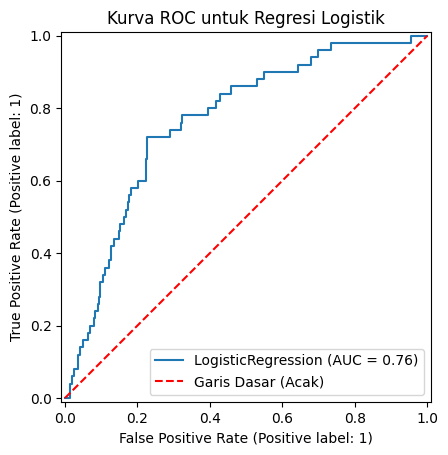

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

# Muat dataset yang sudah di-encode
df = pd.read_csv('data/healthcare-dataset-stroke-data-encoded.csv')

# Pisahkan fitur (X) dan target (y)
X = df.drop('stroke', axis=1)
y = df['stroke']

# Bagi data menjadi set pelatihan dan pengujian (80% latih, 20% uji)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Penanganan Kelas Tidak Seimbang (SMOTE) pada data latih
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Bentuk data latih setelah SMOTE:", X_train_resampled.shape)
print("Distribusi kelas target setelah SMOTE:\n", pd.Series(y_train_resampled).value_counts())

# Latih Model Regresi Logistik
model = LogisticRegression()
model.fit(X_train_resampled, y_train_resampled)

# Buat prediksi pada data uji
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Tampilkan hasil evaluasi
print("\n===== Hasil Evaluasi Model Regresi Logistik =====")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred))
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"\nSkor AUC-ROC: {auc_score:.4f}")

# Visualisasi Kurva ROC
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.title('Kurva ROC untuk Regresi Logistik')
plt.plot([0, 1], [0, 1], 'r--', label='Garis Dasar (Acak)')
plt.legend()
plt.show()